Epoch 1/20


C:\Users\Dawid\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


990/990 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0202
Epoch 2/20
990/990 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0031
Epoch 3/20
990/990 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0029
Epoch 4/20
990/990 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0028
Epoch 5/20
990/990 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0026
Epoch 6/20
990/990 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0028
Epoch 7/20
990/990 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0028
Epoch 8/20
990/990 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0026
Epoch 9/20
990/990 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0027
Epoch 10/20
990/990 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0026
Epoch 11/20
990/990 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0027
Epoch 12/20
990/990 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0026
Epoch 13/20
990/990 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0026
Epoch 14/20
990/990 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0025
Epoch 15/20
990/990 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0025


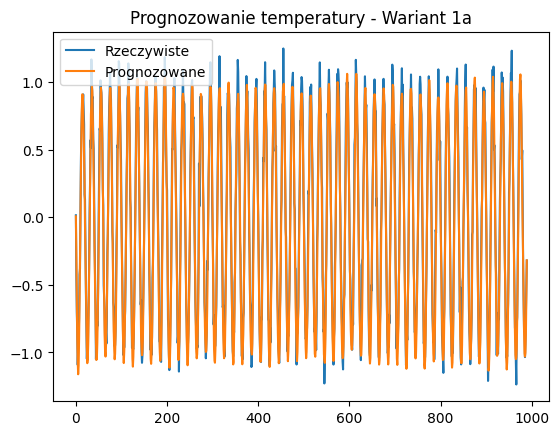

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from keras.models import Sequential 
from keras.layers import LSTM, Dense 
from sklearn.preprocessing import MinMaxScaler 

def generate_forecasting_data(n_samples=1000, freq=0.05, noise=0.1):
    x = np.arange(n_samples) 
    y = np.sin(2 * np.pi * freq * x) + np.random.normal(0, noise, size=n_samples) 
    return y.reshape(-1, 1) 

data = generate_forecasting_data() 

scaler = MinMaxScaler() 
data_scaled = scaler.fit_transform(data) 

def create_dataset(dataset, look_back=10):
    X, Y = [], []
    for i in range(len(dataset) - look_back): 
        X.append(dataset[i:(i + look_back), 0]) 
        Y.append(dataset[i + look_back, 0]) 
    return np.array(X), np.array(Y) 

look_back = 10 
X, y = create_dataset(data_scaled, look_back) 
X = np.reshape(X, (X.shape[0], X.shape[1], 1)) 

model = Sequential() 
model.add(LSTM(50, input_shape=(look_back, 1))) 
model.add(Dense(1)) 
model.compile(optimizer='adam', loss='mean_squared_error') 

model.fit(X, y, epochs=20, batch_size=1, verbose=1) 


predicted = model.predict(X) 
predicted = scaler.inverse_transform(predicted) 
real = scaler.inverse_transform(y.reshape(-1,1)) 

plt.plot(real, label='Rzeczywiste') 
plt.plot(predicted, label='Prognozowane') 
plt.title('Prognozowanie temperatury - Wariant 1a') 
plt.legend() 
plt.show() 

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split

def generate_anomaly_data(n_samples=5000, timesteps=10, anomaly_rate=0.1):
    X = np.random.normal(0, 1, (n_samples, timesteps))
    y = np.zeros(n_samples)
    
    n_anomalies = int(anomaly_rate * n_samples)
    anomalies = np.random.choice(n_samples, n_anomalies, replace=False)
    
    X[anomalies] += np.random.normal(5, 1, (n_anomalies, timesteps))
    y[anomalies] = 1
    
    return X.reshape(n_samples, timesteps, 1), y

X, y = generate_anomaly_data(n_samples=5000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(LSTM(32, input_shape=(X.shape[1], 1)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print("Trenowanie modelu detekcji anomalii (5000 próbek)...")
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Dokładność : {accuracy:.2f}")

Trenowanie modelu detekcji anomalii (5000 próbek)...
Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9500 - loss: 0.1852 - val_accuracy: 1.0000 - val_loss: 0.0039
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 0.0023 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 8.7762e-04
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 6.9594e-04 - val_accuracy: 1.0000 - val_loss: 5.9179e-04
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 4.8708e-04 - val_accuracy: 1.0000 - val_loss: 4.3257e-04
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 3.6500e-04 - val_accuracy: 1.0000 - val_loss: 3.3256e-04
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 2.8586e-04 - val_accuracy: 1.0000 - val_loss: 2.6508e-04
Epoch 8/10
125/

In [6]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split

def generate_pattern_data(n_classes=3, samples_per_class=2000, timesteps=20):
    X, y = [], []
    for cls in range(n_classes): # [cite: 215]
        for i in range(samples_per_class): # [cite: 219]
            if cls == 0:
                seq = np.random.normal(0, 0.2, timesteps)
            elif cls == 1:
                seq = np.sin(np.linspace(0, 3*np.pi, timesteps)) + np.random.normal(0, 0.1, timesteps)
            else:
                seq = np.sin(np.linspace(0, 6*np.pi, timesteps)) + np.random.normal(0, 0.2, timesteps)
            X.append(seq)
            y.append(cls)
            
    X = np.array(X).reshape(-1, timesteps, 1)
    y = tf.keras.utils.to_categorical(y, num_classes=n_classes)
    return X, y

X, y = generate_pattern_data(samples_per_class=2000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(LSTM(64, input_shape=(X.shape[1], 1)))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print("\nTrenowanie modelu rozpoznawania aktywności (6000 próbek)...")
model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_test, y_test), verbose=1)

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Dokładność klasyfikacji aktywności: {accuracy:.2f}")


Trenowanie modelu rozpoznawania aktywności (6000 próbek)...
Epoch 1/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8471 - loss: 0.3897 - val_accuracy: 0.9975 - val_loss: 0.0210
Epoch 2/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9983 - loss: 0.0081 - val_accuracy: 1.0000 - val_loss: 0.0030
Epoch 3/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9994 - loss: 0.0030 - val_accuracy: 1.0000 - val_loss: 6.9516e-04
Epoch 4/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 1.0000 - loss: 4.6475e-04 - val_accuracy: 1.0000 - val_loss: 3.2995e-04
Epoch 5/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 1.0000 - loss: 2.5424e-04 - val_accuracy: 1.0000 - val_loss: 2.1166e-04
Epoch 6/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 1.0000 - loss: 1.7308e-04 - val_accuracy: 1.0000 - val_loss: 1.5281e-04
Epoch 7/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 1.0000 - loss: 1.2882e-04 - val_accuracy: 1.0000 - val_loss: 1.1797e-04
Epoch 8